<a href="https://colab.research.google.com/github/sadidhasan/text-classification/blob/main/reutersdata_keras_modeling_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import keras
keras.__version__

'2.6.0'

In [76]:
#load data available in keras
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [77]:
#understanding the dataset
import numpy as np

print("The number of training samples",len(train_data))
print("The number of testing samples",len(test_data))
print("The shape of training samples array",np.shape(train_data))
print("The shape of training samples labels", np.shape(train_labels))
print("Type of first element in train_data:",type(train_data[0]),", and its shape :",np.shape(train_data[0]))

The number of training samples 8982
The number of testing samples 2246
The shape of training samples array (8982,)
The shape of training samples labels (8982,)
Type of first element in train_data: <class 'list'> , and its shape : (87,)


In [78]:
#word index to text mapping for checking purposes
word_index = reuters.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print('\nFirst Review \n')
print(decode_review(train_data[0]))
print('\nIts label :',train_labels[0])

print('\nSecond Review \n')
print(decode_review(train_data[1]))
print('\nIts label :',train_labels[1])


First Review 

the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs

Its label : 3

Second Review 

the termination payment airport takes 6 of geological 3 6 602 begin up said fully bank expects commodity total is giant a of this takes of series termination payment airport mln a for capital 1 pre 50 american east said in council takes of of france a but u any 4 s 1st losses pct dlrs

Its label : 4


In [79]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [80]:
# Training data
x_train = vectorize_sequences(train_data)
# Test data
x_test = vectorize_sequences(test_data)

In [81]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


In [82]:
# Vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [83]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [84]:
#build a MLP model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [85]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
# separate out a validation set from training data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [87]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [88]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
63/63 [==============================] - 1s 13ms/step - loss: 1.8607 - accuracy: 0.6362 - val_loss: 1.2268 - val_accuracy: 0.7300
Epoch 2/50
63/63 [==============================] - 1s 12ms/step - loss: 0.9648 - accuracy: 0.7895 - val_loss: 1.0234 - val_accuracy: 0.7720
Epoch 3/50
63/63 [==============================] - 1s 12ms/step - loss: 0.6501 - accuracy: 0.8596 - val_loss: 0.8932 - val_accuracy: 0.8080
Epoch 4/50
63/63 [==============================] - 1s 12ms/step - loss: 0.4453 - accuracy: 0.9054 - val_loss: 0.8656 - val_accuracy: 0.8120
Epoch 5/50
63/63 [==============================] - 1s 12ms/step - loss: 0.3223 - accuracy: 0.9295 - val_loss: 0.9513 - val_accuracy: 0.8010
Epoch 6/50
63/63 [==============================] - 1s 12ms/step - loss: 0.2502 - accuracy: 0.9412 - val_loss: 0.8922 - val_accuracy: 0.8240
Epoch 7/50
63/63 [==============================] - 1s 11ms/step - loss: 0.2048 - accuracy: 0.9513 - val_loss: 1.0059 - val_accuracy: 0.8000
Epoch 8/50
63

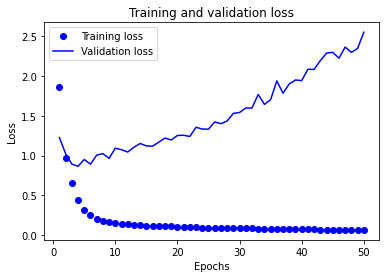

In [89]:
#show trends of training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

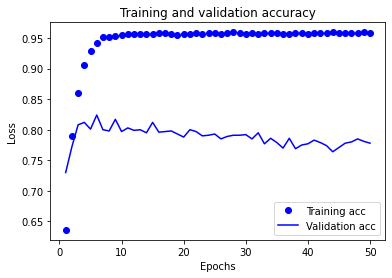

In [90]:
#show trends of training and validation accuracy
plt.clf()   # clf-clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [91]:
results = model.evaluate(x_test, one_hot_test_labels)


71/71 [==============================] - 0s 2ms/step - loss: 3.0915 - accuracy: 0.7622


In [92]:
results

[3.0915474891662598, 0.7622439861297607]

So, the MLP approach reaches an accuracy of ~76%.

In [93]:
#let's try to improve the test accuracy with a more complex network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

In [94]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [95]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
63/63 [==============================] - 4s 50ms/step - loss: 1.7046 - accuracy: 0.6333 - val_loss: 1.0817 - val_accuracy: 0.7510
Epoch 2/50
63/63 [==============================] - 3s 48ms/step - loss: 0.7651 - accuracy: 0.8217 - val_loss: 0.8580 - val_accuracy: 0.8210
Epoch 3/50
63/63 [==============================] - 3s 48ms/step - loss: 0.4191 - accuracy: 0.9027 - val_loss: 0.8306 - val_accuracy: 0.8160
Epoch 4/50
63/63 [==============================] - 3s 48ms/step - loss: 0.2618 - accuracy: 0.9386 - val_loss: 0.8382 - val_accuracy: 0.8260
Epoch 5/50
63/63 [==============================] - 3s 47ms/step - loss: 0.1981 - accuracy: 0.9496 - val_loss: 0.8567 - val_accuracy: 0.8220
Epoch 6/50
63/63 [==============================] - 3s 48ms/step - loss: 0.1709 - accuracy: 0.9540 - val_loss: 0.9456 - val_accuracy: 0.8030
Epoch 7/50
63/63 [==============================] - 3s 48ms/step - loss: 0.1508 - accuracy: 0.9553 - val_loss: 0.9254 - val_accuracy: 0.8160
Epoch 8/50
63

In [96]:
results=model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 1s 9ms/step - loss: 1.6783 - accuracy: 0.7961


In [97]:
results

[1.6782790422439575, 0.7960819005966187]

So, the accuracy reached ~80% with a more complex network and drop out.

Predicted  0   1   2    3    4   6   7   8   ...  37  38  39  40  41  42  43  44
Actual                                       ...                                
0           9   1   0    0    1   0   0   0  ...   0   0   0   0   0   0   0   0
1           0  82   0    5    7   0   0   0  ...   0   0   0   0   0   0   0   0
2           0   2  15    0    0   0   0   0  ...   0   0   0   0   0   0   0   0
3           0   4   1  759   32   0   0   1  ...   0   1   0   0   0   0   0   1
4           1   5   0   22  420   1   0   0  ...   0   0   0   0   0   0   1   0
5           0   5   0    0    0   0   0   0  ...   0   0   0   0   0   0   0   0
6           0   0   0    0    1  13   0   0  ...   0   0   0   0   0   0   0   0
7           0   1   0    1    0   0   1   0  ...   0   0   0   0   0   0   0   0
8           0   1   0    2    4   0   0  27  ...   0   0   0   0   1   0   0   0
9           0   1   0    0    1   0   0   1  ...   0   0   0   0   0   0   0   0
10          0   0   0    0  

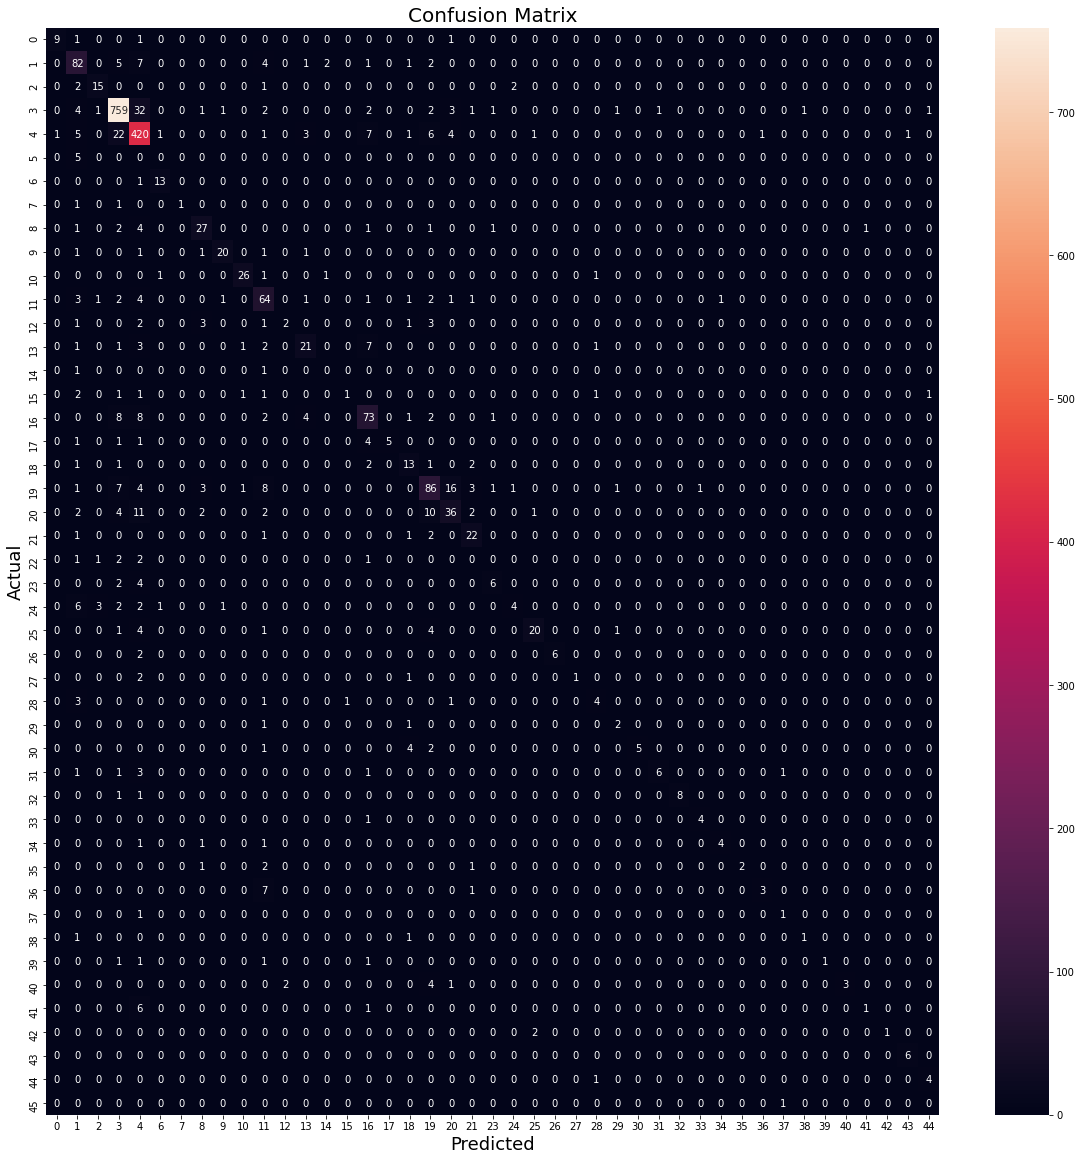

In [98]:
#let's get the predicted labels and visualize the predictions in a confusion matrix
import pandas as pd
import seaborn as sns

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred = pd.Series(y_pred, name='Predicted')
y_test = pd.Series(test_labels, name='Actual')
df_confusion  = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
print(df_confusion)
plt.figure(figsize = (20,20))
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.title('Confusion Matrix',fontsize=20)
sns.heatmap(df_confusion, annot=True,fmt="d")

In [27]:
#let's create a transformer for classification
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [28]:

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions


In [154]:

embed_dim = 100  # Embedding size for each token
num_heads = 1  # Number of attention heads
ff_dim = 64  # Hidden layer size in feed forward network inside transformer
maxlen=256
vocab_size=10000

#shortening the sequence length to fit to memory
from keras.preprocessing.sequence import pad_sequences
x_train_short = pad_sequences(train_data,maxlen=maxlen)
x_test_short =  pad_sequences(test_data,maxlen=maxlen)

x_val_short = x_train_short[:1000]
partial_x_train_short = x_train_short[1000:]

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(46, activation="softmax")(x)

transformer_model = keras.Model(inputs=inputs, outputs=outputs)


In [155]:
transformer_model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
history = transformer_model.fit(partial_x_train_short, partial_y_train, batch_size=128, epochs=10, validation_data=(x_val_short, y_val))

Epoch 1/10
63/63 [==============================] - 42s 640ms/step - loss: 2.2415 - accuracy: 0.4300 - val_loss: 1.7773 - val_accuracy: 0.5620
Epoch 2/10
63/63 [==============================] - 40s 641ms/step - loss: 1.5132 - accuracy: 0.6428 - val_loss: 1.2556 - val_accuracy: 0.7010
Epoch 3/10
63/63 [==============================] - 41s 643ms/step - loss: 1.0163 - accuracy: 0.7585 - val_loss: 1.0068 - val_accuracy: 0.7760
Epoch 4/10
63/63 [==============================] - 40s 642ms/step - loss: 0.7110 - accuracy: 0.8289 - val_loss: 0.9115 - val_accuracy: 0.7870
Epoch 5/10
63/63 [==============================] - 41s 646ms/step - loss: 0.5204 - accuracy: 0.8716 - val_loss: 0.9427 - val_accuracy: 0.7860
Epoch 6/10
63/63 [==============================] - 40s 641ms/step - loss: 0.3856 - accuracy: 0.9043 - val_loss: 0.9120 - val_accuracy: 0.8000
Epoch 7/10
63/63 [==============================] - 41s 646ms/step - loss: 0.2878 - accuracy: 0.9275 - val_loss: 0.9690 - val_accuracy: 0.8010

In [156]:
results=transformer_model.evaluate(x_test_short, one_hot_test_labels)

71/71 [==============================] - 4s 54ms/step - loss: 1.2881 - accuracy: 0.7511
